# Twitter Data Analysis - Week 0 Challenge 10 Academy

In [57]:
# Modules importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import re
from wordcloud import STOPWORDS,WordCloud

from extract_dataframe import TweetDfExtractor
from extract_dataframe import read_json
from clean_tweets_dataframe import Clean_Tweets

The part of code below can be used to import the raw JSON file. If the date were already saved under a csv format, we could skip it and just import the CSV file named.

In [2]:
_, tweet_list = read_json("./data/Economic_Twitter_Data.json")
tweetDfExt = TweetDfExtractor(tweet_list)
tweet_df = tweetDfExt.get_tweet_df(save=True) # Convert the list into a dataframe and extract some features
tweet_df.info() # Get some information about the data set

File Successfully Saved.!!!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24625 non-null  object 
 1   source              24625 non-null  object 
 2   original_text       24625 non-null  object 
 3   polarity            24625 non-null  float64
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      0 non-null      object 
 7   retweet_count       0 non-null      object 
 8   original_author     24625 non-null  object 
 9   followers_count     24625 non-null  int64  
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  9975 non-null   object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       24625 non-null  object 
 14  place               24625 non-null  object 
dtypes: float64(2), int64(2), 

In [69]:
# Importation of the CSV file
tweet_df = pd.read_csv("processed_tweet_data.csv")
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24625 non-null  object 
 1   source              24625 non-null  object 
 2   original_text       24625 non-null  object 
 3   polarity            24625 non-null  float64
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      0 non-null      float64
 7   retweet_count       0 non-null      float64
 8   original_author     24625 non-null  object 
 9   followers_count     24625 non-null  int64  
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  9975 non-null   object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       24625 non-null  object 
 14  place               15731 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 2.8+

In [70]:
tweet_df.head(5)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,NaN,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,NaN,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,NaN,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,de,NaN,NaN,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,de,NaN,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",NaN


## Data preprocessing

For the data cleaning, we:
* Remove the duplicates in the data based on the variable named **"original_text"**
As we want to draw a word cloud, to know what are the words, the duplicated texts could highly influence the graphs.
* Convert the features into the right types
Looking at the result of the previous block of code, let's notice that the feature **"created_at"** is considered as an object. One of the best approach is to vonvert it as a datetime object.
* Remove all the non english tweet
The developed libraries under Python that could manage natural language processing (NLP) only deal with english words. So, we can just remove all the non english tweets and just focus on the english ones.

But before removing the non english tweets, we can look at the repitition of the languages used for the tweets.

In [71]:
tweets_prepro = Clean_Tweets(tweet_df)
# Drop duplicates
tweet_df = tweets_prepro.drop_duplicate('original_text')
# Convert "created at" into datetime object
tweet_df = tweets_prepro.convert_to_datetime('created_at')

Automation in Action...!!!


In [72]:
print(tweet_df.shape)
tweet_df.info()

(22370, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22370 entries, 0 to 24624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          22370 non-null  datetime64[ns, UTC]
 1   source              22370 non-null  object             
 2   original_text       22370 non-null  object             
 3   polarity            22370 non-null  float64            
 4   subjectivity        22370 non-null  float64            
 5   lang                22370 non-null  object             
 6   favorite_count      0 non-null      float64            
 7   retweet_count       0 non-null      float64            
 8   original_author     22370 non-null  object             
 9   followers_count     22370 non-null  int64              
 10  friends_count       22370 non-null  int64              
 11  possibly_sensitive  9598 non-null   object             
 12  hashtags            

## Text pre-processing

In [73]:
# Define the functions for text pre-processing
## Remove numerical character
def remov_num(tweet):
    '''Remove the numerical character from the text of each tweet'''
    import re
    return re.sub(r'[0-9]+', '', tweet)

## Standardize the formatting
def stand_format(tweet):
    '''Standardize the formatting'''
    tweet = tweet.astype(str)
    return tweet.apply(lambda x: x.lower())

## Remove https
def remov_https(tweet):
    import re
    return re.sub('https','',tweet)

In [74]:
tweet_df['preproc_text'] = tweet_df['original_text'].apply(remov_num)
tweet_df['preproc_text'] = stand_format(tweet_df['preproc_text'])
tweet_df['preproc_text'] = tweet_df['preproc_text'].apply(remov_https)
tweet_df['preproc_text']

0        rt @nikitheblogger: irre: annalena baerbock sa...
1        rt @sagt_mit: merkel schaffte es in  jahr  mil...
2        rt @kryptonoun: @wri pharma in lebensmitteln, ...
3        rt @wri: die #deutschen sind ein braves volk!....
4        rt @rolandtichy: baerbock verkündet mal so neb...
                               ...                        
24619    rt @tara: राजगढ़ नगर पालिका अध्यक्ष भाजपा का ह...
24620    rt @waglenikhil: आपल्या घरातल्या कोणत्याही कार...
24622    rt @parthtiwari: gujarat congress mla arrested...
24623    rt @newstvchannel: cm नीतीश कुमार ने तेजस्वी य...
24624    rt @suvegrathi: भगवान और खुदा आपस में बात कर र...
Name: preproc_text, Length: 22370, dtype: object

## Data exploration

In [75]:
# Extract the five most languages used
mostcount = tweet_df["lang"].value_counts()
fig = px.bar(mostcount,x=mostcount.index[:5],y=mostcount.values[:5],
             labels={'x':'Languagues','y':'# of Tweet'})
fig.show()

According to the above plot, most of the tweets were written in english $(15.082k)$ after which there is $1706$ of undetermined, $1387$ in hindi, $714$ in deutsch and $538$ in Bengali.
But the interpretation of these data can be confusing. Are those who have been talking about economic difficulties the most in English-speaking countries, or do Internet users use English more to make themselves heard? </br>It would therefore be interesting to look at the location used for the posts.

In [76]:
location = tweet_df['place'].dropna().value_counts()
fig = px.bar(location,x=location.index[:10],y=location.values[:10],labels={'x':'Location','y':'# Number of tweets'})
fig.show()

The majority ($815$) of the tweets indicate as location "India". But among the remaining labels we also get some names of cities located in India. </br>
We can then say that most of the tweets in our database are either written by Internet users residing in India or that these tweets describe economic situations related to India.</br>
However, this information should be taken with caution since after grouping the other cities by country, we could have more occurrences for another country. For this, a more thorough approach in cleaning the data should be taken into account.

In [77]:
# Get only the english tweet
tweet_df = tweets_prepro.remove_non_english_tweets()
tweet_df.shape

(15082, 16)

In [78]:
# Descriptive statistics
tweet_df.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,15082.000000,15082.000000,0.0,0.0,1.508200e+04,15082.000000
mean,0.088552,0.310867,NaN,NaN,5.621884e+04,1390.723710
std,0.276101,0.316366,NaN,NaN,4.397814e+05,3068.490121
min,-1.000000,0.000000,NaN,NaN,0.000000e+00,0.000000
25%,0.000000,0.000000,NaN,NaN,1.250000e+02,117.000000
50%,0.000000,0.275000,NaN,NaN,5.620000e+02,450.000000
75%,0.200000,0.525855,NaN,NaN,2.254000e+03,1507.000000
max,1.000000,1.000000,NaN,NaN,6.027402e+06,41866.000000


* Polarity</br>
The polarity average and median respectively equal to $0.08 \approx 0.1$ and $0.0$ mean that most of the tweets are neutral.
* Subjectivity</br>
"Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information."[Medium](https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524). As we found an average and median values equal to $0.31$ and $0.27$ that are less than $0.5$, we can conclude that the majority of the tweets are based on factual information. We can then rely on them to understand or to have an overview of the economic hardships people are facing and tweeting about. 

In [79]:
# Get the list of hashtags for each tweet
def extract_hashtags(tweet):
    '''Extract the hashtags from the tweet'''
    return re.findall(r'\B#\w*[a-zA-Z]+\w*', tweet)

In [80]:
# Extract the hashtags for the tweets
tweet_df["hashtags"] = tweet_df["original_text"].apply(extract_hashtags)
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15082 entries, 38 to 24622
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          15082 non-null  datetime64[ns, UTC]
 1   source              15082 non-null  object             
 2   original_text       15082 non-null  object             
 3   polarity            15082 non-null  float64            
 4   subjectivity        15082 non-null  float64            
 5   lang                15082 non-null  object             
 6   favorite_count      0 non-null      float64            
 7   retweet_count       0 non-null      float64            
 8   original_author     15082 non-null  object             
 9   followers_count     15082 non-null  int64              
 10  friends_count       15082 non-null  int64              
 11  possibly_sensitive  6019 non-null   object             
 12  hashtags            15082 non-n

In [81]:
# Get each hastags from the list
hashtags_list = tweet_df["hashtags"].explode()
# Standardize formatting for the list of hashtags (can use lower case or upper case)
hashtags_list = stand_format(hashtags_list.dropna())
# Count the values of each hashtags
hashcount = hashtags_list.value_counts()
hashcount.head(5)

#marvininu    304
#inflation    188
#ukraine      152
#marvin       142
#gold         111
Name: hashtags, dtype: int64

In [82]:
# Plot the occurences of each hashtag
fig = px.bar(hashcount,x=hashcount.index[:10],y=hashcount.values[:10],labels={'x':'Hashtag','y':'# of occurence'})
fig.show()

The most used hashtag is "#marvininu" before "inflation", "ukraine" and "marvin" again.

## Draw our word cloud


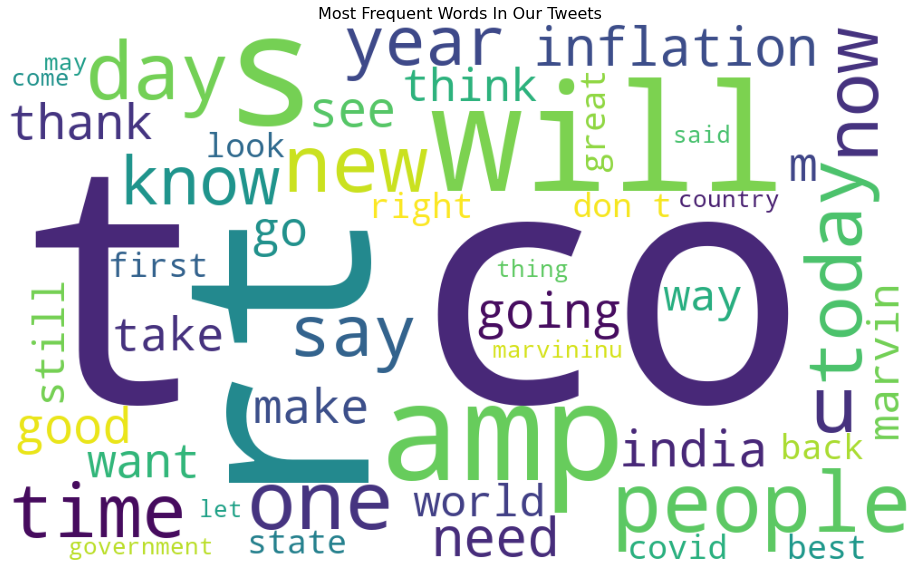

In [84]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS,max_words=50,background_color="white").generate(' '.join(tweet_df.preproc_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [86]:
tweet_df.to_csv("clean_preprocessed.csv",index=False)